In [1]:
import netCDF4 as nc
import glob
root_path = 'data/S3A_OL_1_EFR____20220505T104612_20220505T104912_20220506T110047_0179_085_051_2340_PS1_O_NT_002.SEN3/*'
files=glob.glob(root_path)


In [2]:
index=14
fn = files[index]
ds = nc.Dataset(fn)
import xarray as xr
ds = xr.open_dataset(files[index])
ds

<xarray.Dataset>
Dimensions:        (rows: 4091, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa03_radiance  (rows, columns) float32 ...
Attributes: (12/17)
    absolute_orbit_number:  32364
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2022-05-06T11:00:47Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.12
    start_time:             2022-05-05T10:46:12.235342Z
    stop_time:              2022-05-05T10:49:12.200362Z
    title:                  OLCI Level 1b Product, Radiance Oa03 Data Set

Text(0.5, 1.0, 'OLCI Level 1b Product, Radiance Oa03 Data Set')

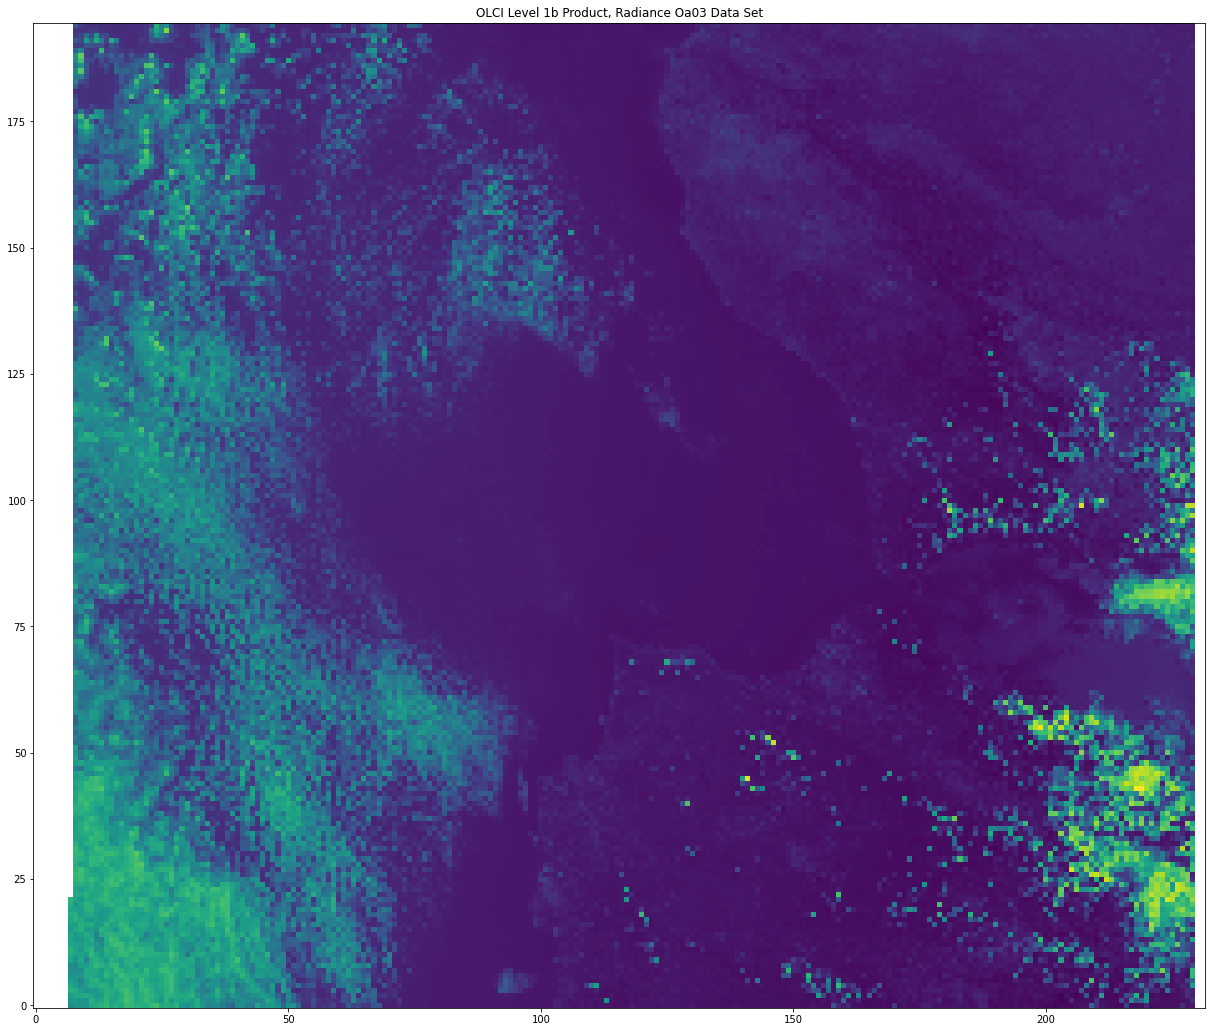

In [3]:
import matplotlib.pyplot as plt
import netCDF4

nc = netCDF4.Dataset(fn)

# examine the variables
nc.variables['Oa03_radiance']

# sample every 10th point of the 'z' variable
topo = nc.variables['Oa03_radiance'][::21,::21]

# make image
plt.figure(figsize=(21,21))
plt.imshow(topo,origin='lower') 
plt.title(nc.title)

In [4]:
#ToDo:

In [6]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, TileLayer

m = Map(
    basemap=basemap_to_tiles(basemaps.OpenStreetMap.Mapnik),
    center=(38.691137, -9.215931),
    zoom=15
    )
m

Map(center=[38.691137, -9.215931], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [ ]:
from ipyleaflet import Map, Velocity, TileLayer, basemaps
import xarray as xr
import os

ds = xr.open_dataset('wind-global.nc')
display_options = {
'velocityType': 'Global Wind',
'displayPosition': 'bottomleft',
'displayEmptyString': 'No wind data'
}
wind = Velocity(data=ds,
zonal_speed='u_wind',
meridional_speed='v_wind',
latitude_dimension='lat',
longitude_dimension='lon',
velocity_scale=0.01,
max_velocity=20,
display_options=display_options)
m.add_layer(wind)
m